In [3]:
import matplotlib.pylab as plt
%matplotlib inline

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [4]:
path_src = "../src/"
sys.path.append(path_src)

### Casual evaluation

In [21]:
from pycocotools.coco import COCO
import os
from PIL import Image
from datasets.vocab_coco import VocabularyBuilder, Vocabulary

In [7]:
# load val dataset

dataset_dir='../data/coco/'
data_type='val2014'

ann_file = os.path.join(dataset_dir,'annotations',f'captions_{data_type}.json')
coco=COCO(ann_file)

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


In [27]:
# get some img and captions
some_id = coco.getImgIds()[35]
img_info = coco.loadImgs([some_id])[0]
img = Image.open(os.path.join(dataset_dir,data_type,img_info['file_name']))

In [33]:
# get train vocab
vocab_path=os.path.join('../materials/weights/input','vocab.pkl')
vocab = VocabularyBuilder.load(vocab_path=vocab_path)

In [40]:
from datasets.transforms_coco import transforms
import torch
from models.resnet_152_lstm import EncoderCNN, DecoderRNN

device = 'cpu'

encoder = EncoderCNN(256).eval()
decoder = DecoderRNN(256, 512, len(vocab), 1)

encoder = encoder.to(device)
decoder = decoder.to(device)

# Load the trained model parameters
encoder.load_state_dict(torch.load(os.path.join('../materials/weights/input','encoder.pth')))
decoder.load_state_dict(torch.load(os.path.join('../materials/weights/input','decoder.pth')))

<All keys matched successfully>

In [35]:
image_tensor = transforms['init'](img).to(device)

In [45]:
feature = encoder(image_tensor.unsqueeze(0))
sampled_ids = decoder.sample(feature)
sampled_ids = sampled_ids[0].cpu().numpy()  

In [46]:
sampled_ids

array([   1, 8397, 6353,  569, 8397, 5582, 4691, 8397, 4412,  511, 5282,
       8397, 6811,   96,    2,    2,   96,    2,    2,   96])

In [47]:
sampled_caption = []
for word_id in sampled_ids:
    word = vocab.idx2word[word_id]
    sampled_caption.append(word)
    if word == '<end>':
        break
sentence = ' '.join(sampled_caption)

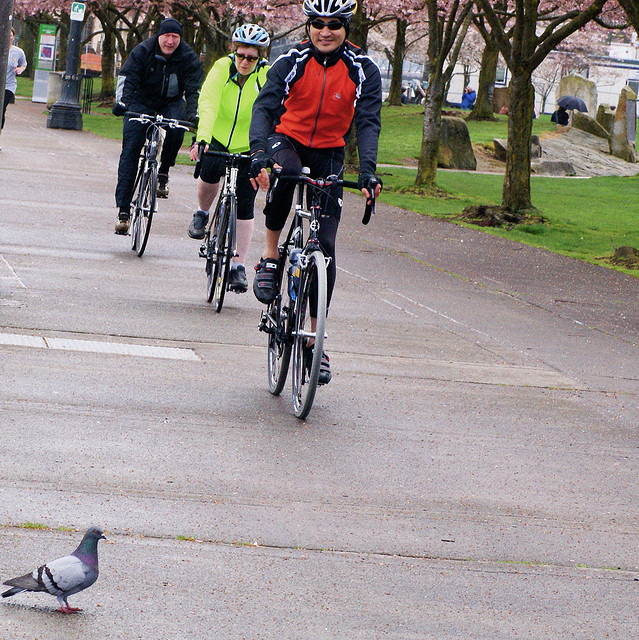

In [49]:
img

In [50]:
sentence

'<start> a man riding a bike on a street next to a bicycle . <end>'

In [51]:
captions = coco.showAnns(
    coco.loadAnns(
        coco.getAnnIds(imgIds=[some_id])
    )
)

People riding bicycles down the road approaching a bird.
three bicycle riders some trees and a pigeon
A geoup of people on bicycles coming down a street.
Several smiling bicycle riders approaching a colorful pigeon.
A pigeon greets three bicyclists on a park path
